In [1]:
import csv
import requests
from io import StringIO

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, Flatten
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

import nltk
import os
nltk_data_path = os.path.join(os.getcwd(), 'nltk_data')

# Download the necessary NLTK data to the specified directory
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

# Append the nltk_data path to the NLTK data path
nltk.data.path.append(nltk_data_path)

[nltk_data] Downloading package punkt_tab to e:\Fadhel\DOKUMEN\LATIHAN
[nltk_data]     \googleplay_sentiment\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to e:\Fadhel\DOKUMEN\LATIHAN
[nltk_data]     \googleplay_sentiment\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df = pd.read_csv('complete_tokopedia_review.csv')
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,...,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_final,polarity_score,polarity,text_length
0,0,3a2220cd-3e1c-45c6-b3fb-8bdb8eeeb8e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kapok belanja di Tokopedia. Pernah beli baju d...,1,143,3.281.0,2024-09-19 19:03:22,"Hi Toppers, silakan sampaikan kritik/saran ata...",...,3.281.0,Kapok belanja di Tokopedia Pernah beli baju di...,kapok belanja di tokopedia pernah beli baju di...,kapok belanja di tokopedia pernah beli baju di...,"['kapok', 'belanja', 'di', 'tokopedia', 'perna...","['kapok', 'belanja', 'tokopedia', 'beli', 'baj...",kapok belanja tokopedia beli baju toko colorbo...,-17,negative,35
1,1,ef1c1390-ccb8-4122-9b8f-4b27cc77b17e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia jelek banget. Diskon nya gk ada. Bar...,1,489,3.280.0,2024-09-12 07:33:28,"Toppers, mohon maaf atas kendala yang kamu ala...",...,3.280.0,Tokopedia jelek banget Diskon nya gk ada Baran...,tokopedia jelek banget diskon nya gk ada baran...,tokopedia jelek banget diskon nya gk ada baran...,"['tokopedia', 'jelek', 'banget', 'diskon', 'ny...","['tokopedia', 'jelek', 'banget', 'diskon', 'gk...",tokopedia jelek banget diskon gk barang dijual...,-10,negative,38
2,2,575d00d7-2090-42a8-8ffc-6b1056c9d158,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terlalu banyak aturan, masa beli menggunakan a...",1,301,3.279.0,2024-09-12 16:23:47,"Halo Toppers, terima kasih atas rating yang ka...",...,3.279.0,Terlalu banyak aturan masa beli menggunakan ak...,terlalu banyak aturan masa beli menggunakan ak...,terlalu banyak aturan masa beli menggunakan ak...,"['terlalu', 'banyak', 'aturan', 'masa', 'beli'...","['aturan', 'beli', 'akun', 'dibatalkan', 'sist...",aturan beli akun dibatalkan sistem jelas² hand...,-19,negative,35
3,3,692de8de-cddf-4443-bfde-c121baa55ee4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kalo bisa ngasih rating - 10 pasti tak kasih b...,1,124,3.279.0,2024-09-10 20:26:38,"Hi Toppers, silakan sampaikan kritik/saran ata...",...,3.279.0,Kalo bisa ngasih rating pasti tak kasih bint...,kalo bisa ngasih rating pasti tak kasih bint...,kalau bisa memberikan rating pasti tidak kasih...,"['kalau', 'bisa', 'memberikan', 'rating', 'pas...","['rating', 'kasih', 'bintang', 'kecewa', 'bang...",rating kasih bintang kecewa banget x transaksi...,-4,negative,30
4,4,3f81143a-6379-4a46-9cf3-8860761d4739,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Udah bertahun tahun pakek tokped . Ini pengala...,1,45,3.280.0,2024-09-16 07:51:07,"Hi Toppers, silakan sampaikan kritik/saran ata...",...,3.280.0,Udah bertahun tahun pakek tokped Ini pengalam...,udah bertahun tahun pakek tokped ini pengalam...,sudah bertahun tahun pakek tokped ini pengalam...,"['sudah', 'bertahun', 'tahun', 'pakek', 'tokpe...","['bertahun', 'pakek', 'tokped', 'pengalaman', ...",bertahun pakek tokped pengalaman terburuk alam...,-19,negative,32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              153000 non-null  object        
 1   userName              153000 non-null  object        
 2   userImage             153000 non-null  object        
 3   content               153000 non-null  object        
 4   score                 153000 non-null  int64         
 5   thumbsUpCount         153000 non-null  int64         
 6   reviewCreatedVersion  107204 non-null  object        
 7   at                    153000 non-null  datetime64[ns]
 8   replyContent          77321 non-null   object        
 9   repliedAt             77321 non-null   datetime64[ns]
 10  appVersion            107204 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 12.8+ MB


In [6]:
df.dropna(inplace=True)

In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(59901, 11)

In [9]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Remove hashtag
    text = re.sub(r'RT[\s]', '', text) # Remove RT
    text = re.sub(r"http\S+", '', text) # Remove link
    text = re.sub(r'[0-9]+', '', text) # Remove numbers
    text = re.sub(r'[^\w\s]', '', text) # Remove characters other than letters and numbers
 
    text = text.replace('\n', ' ') # Replace newlines with spaces
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove all punctuation
    text = text.strip(' ') # Removes space characters from the left and right of the text
    return text
 
def casefoldingText(text): # Changes all characters in text to lowercase
    text = text.lower()
    return text
 
def tokenizingText(text): # Splits strings or text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwords in text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    
    return text

def stemmingText(text): # Reducing a word to its basic form which removes prefixes and suffixes or to the root of the word
    # Create a stemmer object
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    # Split text into lists of words
    words = text.split()
    
    # Apply stemming to each word in the list
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Combining stemmed words
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

def toSentence(list_words): # Converts a list of words into sentences
    sentence = ' '.join(word for word in list_words)
    
    return sentence

In [10]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [11]:
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
            
    fixed_text = ' '.join(fixed_words)

    return fixed_text

In [12]:
# Cleans the text and saves it in the 'text_clean' column
df['text_clean'] = df['content'].apply(cleaningText)

# Changes letters in text to lowercase and saves them in 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Replace slang words with standard words and store them in 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Splits text into tokens (words) and stores them in 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Removes stopword and stores them in 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Combines tokens into sentences and stores them in 'final_text'
df['text_final'] = df['text_stopword'].apply(toSentence)

In [13]:
# Read positive words dictionary data from GitHub
lexicon_positive = dict()

# Send an HTTP request to get a CSV file from GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    # If the request succeeds
    # Read response text as a CSV file using a CSV reader with comma separators
    reader = csv.reader(StringIO(response.text), delimiter=',')
    
    for row in reader:
        # Loop through each row in a CSV file
        # Added positive words and their scores to the lexicon_positive dictionary
        lexicon_positive[row[0]] = int(row[1])

else:
    print('Failed to fetch positive lexicon date')
    
# Read negative words dictionary data from GitHub
lexicon_negative = dict()

# Send an HTTP request to get a CSV file from GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    # If the request succeeds
    # Read response text as a CSV file using a CSV reader with comma separators
    reader = csv.reader(StringIO(response.text), delimiter=',')
    
    for row in reader:
        # Loop through each row in a CSV file
        # Added negative words and their scores to the lexicon_negative dictionary
        lexicon_negative[row[0]] = int(row[1])

else:
    print('Failed to fetch negative lexicon date')

In [14]:
# Function to determine the sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    # For word in text:
    score = 0 # Initialize sentiment score to 0
    for word in text:
        # Loops every word in the text
        if (word in lexicon_positive):
            # If the word is in the positive dictionary, add its score to the sentiment score
            score = score + lexicon_positive[word]
            
    for word in text:
        # Loops every word in the text again
        if (word in lexicon_negative):
            # If the word is in the negative dictionary, subtract its score to the sentiment score
            score = score + lexicon_negative[word]
    
    # Initialize polarity variables
    polarity = ''
    
    if (score >= 0):
        # If the sentiment score is greater than or equal to 0, then the polarity is positive
        polarity = 'positive'        
    elif (score < 0):
        # If the sentiment score is less than 0, then the polarity is negative
        polarity = 'negative'
        
    return score, polarity

In [15]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
positive    32423
negative    27478
Name: count, dtype: int64


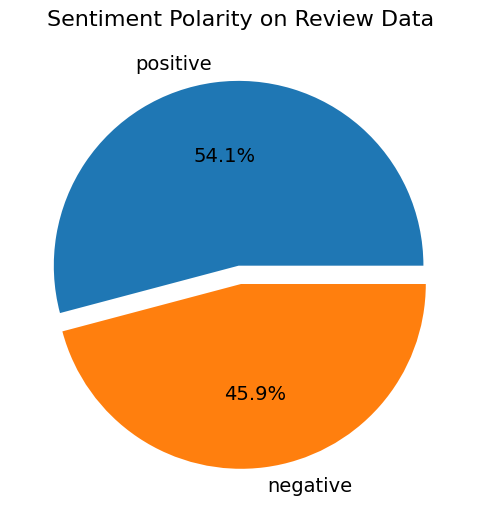

In [16]:
fig, ax = plt.subplots(figsize=(6,6))
sizes = [count for count in df['polarity'].value_counts()]
labels = list(df['polarity'].value_counts().index)
explode = (0.1, 0)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

In [17]:
# pd.set_option('display.max_colwidth', 3000)
positive_tweets = df[df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_final', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [18]:
# pd.set_option('display.max_colwidth', 3000)
negative_tweets = df[df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_final', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)
# negative_tweets = negative_tweets[:10]
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

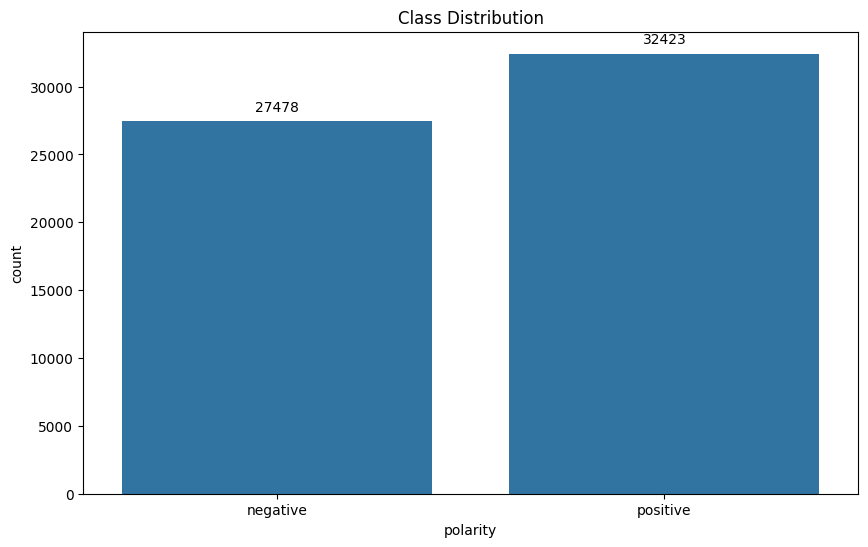

In [19]:
plt.figure(figsize=(10,6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=df)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center',
                            xytext=(0,10),
                            textcoords='offset points')

plt.show()

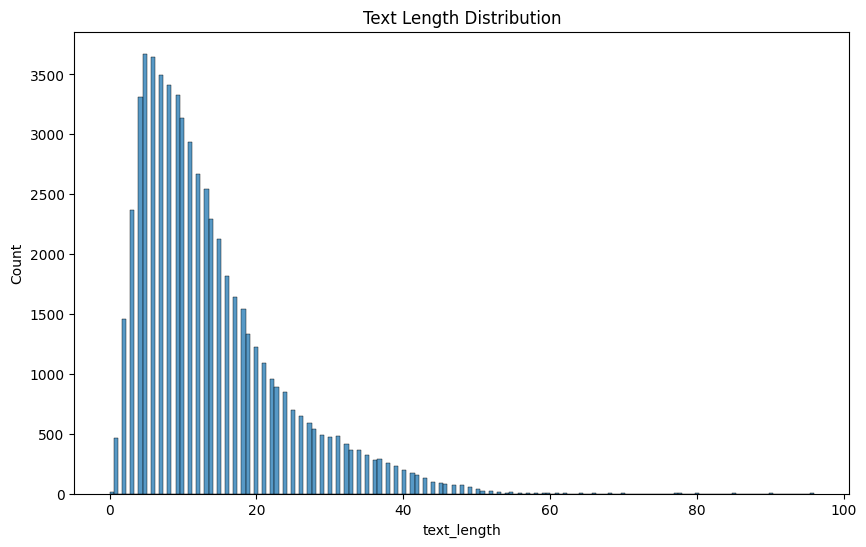

In [20]:
plt.figure(figsize=(10,6))

# Visualize text length distribution
df['text_length'] = df['text_final'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')

plt.show()

## CNN-LSTM Model
splitting dataset 70:30

In [21]:
# Function to store results
results = []

# CNN-LSTM Model
def cnn_lstm_model(X, y):
    # Parameters for tokenization and padding
    max_features = 5000  # Vocabulary size
    max_len = 100  # Maximum length of each sequence

    # Tokenize the text data
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)  # Convert text to sequences of integers
    X = pad_sequences(X, maxlen=max_len)  # Pad sequences to ensure uniform input length

    # Encode the labels to numeric values (e.g., 0, 1, 2, etc.)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = np.array(y)  # Convert labels to numpy array

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Build the CNN-LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))  # Embedding layer
    model.add(SpatialDropout1D(0.2))  # Dropout to prevent overfitting
    
    # CNN Layer
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # Convolutional layer
    model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
    
    # LSTM Layer
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
    
    # Dense Output Layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

    # Evaluate on training and testing data
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    
    results.append({
        'Model': 'CNN-LSTM',
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })

## LSTM Model
splitting dataset 80:20

In [22]:
def lstm_model(X, y):
    max_features = 5000
    max_len = 100

    # Tokenization and Padding
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=max_len)

    # Convert labels to numeric (if not already)
    if y.dtype == 'object':
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        y = le.fit_transform(y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Definition
    model = Sequential()
    model.add(Embedding(max_features, 100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    
    results.append({
        'Model': 'LSTM',
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })

## Bi-LSTM Model
splitting dataset 80:20

In [23]:
def bilstm_model(X, y):
    # Parameters for tokenization and padding
    max_features = 5000  # Vocabulary size
    max_len = 128  # Maximum length of each sequence

    # Tokenize the text data
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)  # Convert text to sequences of integers
    X = pad_sequences(X, maxlen=max_len)  # Pad sequences to ensure uniform input length

    # Encode the labels to numeric values (e.g., 0, 1, 2, etc.)
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = to_categorical(y)  # Convert labels to one-hot encoding for multiclass classification

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the BiLSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_features, output_dim=100, input_length=max_len))
    model.add(SpatialDropout1D(0.2))  # Add dropout to prevent overfitting
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))  # BiLSTM layer
    model.add(Dense(y.shape[1], activation='softmax'))  # Output layer for multiclass classification

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)

    # Evaluate on training and testing data
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    print(f'Training Accuracy: {train_accuracy:.4f}')
    print(f'Testing Accuracy: {test_accuracy:.4f}')
    
    results.append({
        'Model': 'BiLSTM',
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': test_accuracy
    })
    

In [24]:
cnn_lstm_model(df['text_final'], df['polarity'])

e:\Fadhel\DOKUMEN\LATIHAN\googleplay_sentiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.7842 - loss: 0.4207 - val_accuracy: 0.9279 - val_loss: 0.1765
Epoch 2/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.9425 - loss: 0.1471 - val_accuracy: 0.9334 - val_loss: 0.1626
Epoch 3/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.9571 - loss: 0.1125 - val_accuracy: 0.9350 - val_loss: 0.1722
Epoch 4/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.9699 - loss: 0.0813 - val_accuracy: 0.9329 - val_loss: 0.1820
Epoch 5/5
656/656 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.9788 - loss: 0.0601 - val_accuracy: 0.9326 - val_loss: 0.1984
Training Accuracy: 0.9901
Testing Accuracy: 0.9326


In [25]:
lstm_model(df['text_final'], df['polarity'])

Epoch 1/5


e:\Fadhel\DOKUMEN\LATIHAN\googleplay_sentiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


749/749 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.7895 - loss: 0.4131
Epoch 2/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.9362 - loss: 0.1557
Epoch 3/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.9553 - loss: 0.1188
Epoch 4/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 71s 95ms/step - accuracy: 0.9638 - loss: 0.0977
Epoch 5/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.9679 - loss: 0.0865
Training Accuracy: 0.9837
Testing Accuracy: 0.9453


In [26]:
bilstm_model(df['text_final'], df['polarity'])

Epoch 1/5


e:\Fadhel\DOKUMEN\LATIHAN\googleplay_sentiment\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


749/749 ━━━━━━━━━━━━━━━━━━━━ 243s 318ms/step - accuracy: 0.7891 - loss: 0.4183 - val_accuracy: 0.9127 - val_loss: 0.2035
Epoch 2/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 227s 303ms/step - accuracy: 0.9382 - loss: 0.1541 - val_accuracy: 0.9373 - val_loss: 0.1587
Epoch 3/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 226s 302ms/step - accuracy: 0.9495 - loss: 0.1214 - val_accuracy: 0.9377 - val_loss: 0.1561
Epoch 4/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 229s 306ms/step - accuracy: 0.9627 - loss: 0.0987 - val_accuracy: 0.9400 - val_loss: 0.1621
Epoch 5/5
749/749 ━━━━━━━━━━━━━━━━━━━━ 220s 294ms/step - accuracy: 0.9680 - loss: 0.0874 - val_accuracy: 0.9392 - val_loss: 0.1704
Training Accuracy: 0.9789
Testing Accuracy: 0.9392


In [27]:
# Display results
results_df = pd.DataFrame(results)
print(results_df)

      Model  Training Accuracy  Testing Accuracy
0  CNN-LSTM           0.990055          0.932614
1      LSTM           0.983681          0.945330
2    BiLSTM           0.978861          0.939154
